In [1]:
import pandas as pd
import scanpy as sc
import os
import numpy as np
import anndata
import matplotlib.pylab as plt
import seaborn as sb
import packages
import scrublet as scr
# import sys
# sys.path.insert(0,'/Users/tmj23/Documents/Data analysis/IV_BCG/packages/')
# import useful_plotting_helpers as hh

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.1 pandas==1.3.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.9 pynndescent==0.5.6


In [3]:
# The next two lines of code set useful defaults for matplotlib plotting
# when you run these, it will update the settings for any code you run after (but won't change plots youaready made etc)

plt.rcParams["figure.figsize"]=(6,6) # I set the figure size to this because it is nice when UMAPs are square. If I want the plot to be not scare for other plot types, I copy this line of code into the same code chunk as the newplot and change the dimensions 

# these two lines are confusing, but they are very important for if you would like to edit figures in illustrator later
# if you don't run this, the text will not be edit-able
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [6]:
# concat_adata= sc.read_h5ad("/Users/tmj23/Documents/Data analysis/IV_BCG/ivbcg_tcell_filtered_qc.h5ad")
concat_adata= sc.read_h5ad("/Users/tmj23/Documents/Data analysis/IV_BCG/analysis objects/IV_BCG_h5ads_ivbcg_umap_n15_nn40.h5ad")


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/Users/tmj23/Documents/Data analysis/IV_BCG/analysis objects/IV_BCG_h5ads_ivbcg_umap_n15_nn40.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [5]:
concat_adata

NameError: name 'concat_adata' is not defined

In [ ]:
#highly expressed genes
sc.pl.highest_expr_genes(concat_adata, n_top=20, )

In [ ]:
# concat_adata.var['total_expression'] = concat_adata.X.sum(0)
# concat_adata.var['total_expression'].nlargest(20)

In [ ]:
# concat_adata.var

In [ ]:
# fig,ax=plt.subplots(2,1,figsize=(15,10))
# # sc.pl.violin(concat_adata, 'percent_mito',groupby="treatment_monkey_array",show=False,rotation=90,ax=ax[0])
# sc.pl.violin(concat_adata,'n_genes_by_counts',groupby="Sample Type",show=False,rotation=90,ax=ax[0])
fig,ax=plt.subplots(2,1,figsize=(15,10))
# sc.pl.violin(concat_adata, 'percent_mito',groupby="treatment_monkey_array",show=False,rotation=90,ax=ax[0])
sc.pl.violin(concat_adata,'n_genes_by_counts',groupby="Sample Type",show=False,rotation=90,ax=ax[0])
sc.pl.violin(concat_adata,'total_counts',groupby="Sample Type",show=False,rotation=90,ax=ax[1])# sc.pl.violin(concat_adata,'total_counts',groupby="Sample Type",show=False,rotation=90,ax=ax[1])

In [ ]:
# fig,ax=plt.subplots(2,1,figsize=(15,10))
# sc.pl.violin(concat_adata,'n_genes_by_counts',groupby="M.No",show=False,rotation=90,ax=ax[0])
# sc.pl.violin(concat_adata,'total_counts',groupby="M.No",show=False,rotation=90,ax=ax[1])

# # sc.pl.violin(concat_adata, ['n_genes_by_counts', 'total_counts'],
# #              jitter=0.4, multi_panel=True,groupby="M.No", rotation=90)

In [16]:
concat_adata.obs["Overall Array Number"]=concat_adata.obs["Overall Array Number"].astype(str)

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:ylabel='total_counts'>

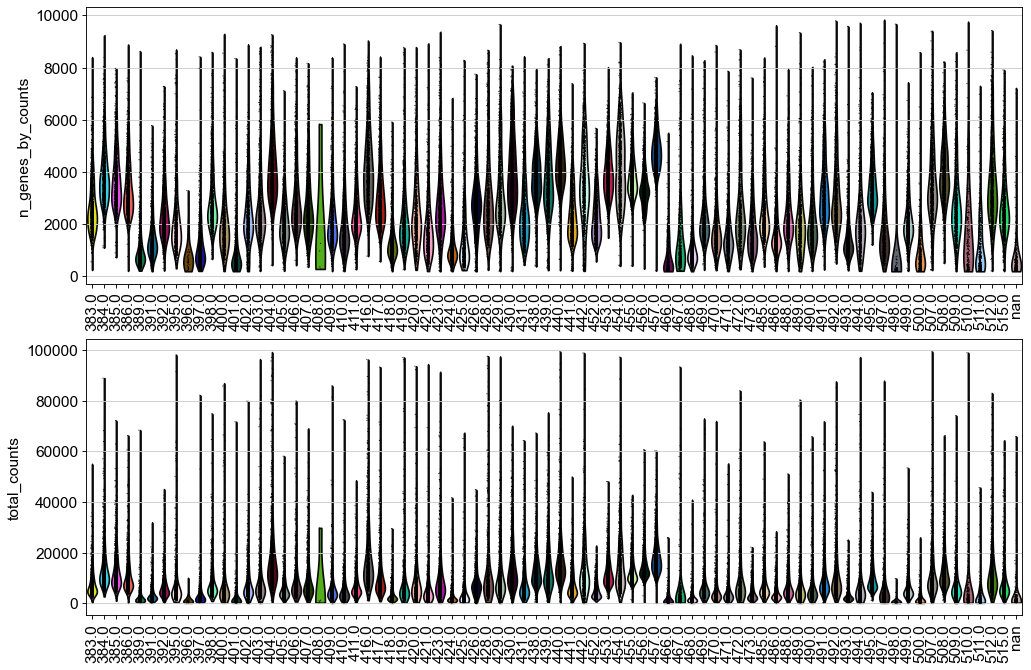

In [85]:
# fig,ax=plt.subplots(2,1,figsize=(15,10))
# # sc.pl.violin(concat_adata, 'percent_mito',groupby="treatment_monkey_array",show=False,rotation=90,ax=ax[0])
# sc.pl.violin(concat_adata,'n_genes_by_counts',groupby="Overall Array Number",show=False,rotation=90,ax=ax[0])
# sc.pl.violin(concat_adata,'total_counts',groupby="Overall Array Number",show=False,rotation=90,ax=ax[1])


# # sc.pl.violin(concat_adata, ['n_genes_by_counts', 'total_counts'],
# #              jitter=0.4, multi_panel=True,groupby="Overall Array Number", rotation=90)

In [18]:
# fig,ax=plt.subplots(2,1,figsize=(15,10))
# # sc.pl.violin(concat_adata, 'percent_mito',groupby="treatment_monkey_array",show=False,rotation=90,ax=ax[0])
# sc.pl.violin(concat_adata,'n_genes_by_counts',groupby="sample",show=False,rotation=90,ax=ax[0])
# sc.pl.violin(concat_adata,'total_counts',groupby="sample",show=False,rotation=90,ax=ax[1])

# # sc.pl.violin(concat_adata, ['n_genes_by_counts', 'total_counts'],
# #              jitter=0.4, multi_panel=True,groupby="sample", rotation=90)

... storing 'Overall Array Number' as categorical


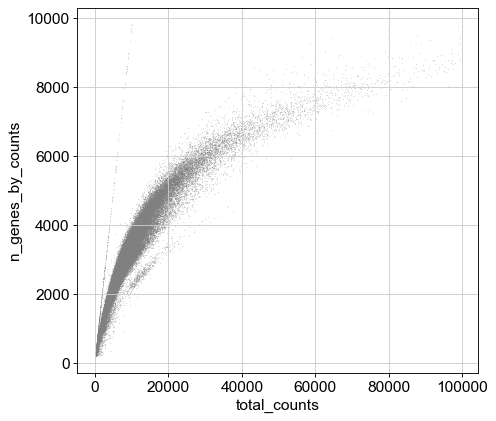

In [19]:
# sc.pl.scatter(concat_adata, x='total_counts', y='pct_counts_mt') 
sc.pl.scatter(concat_adata, x='total_counts', y='n_genes_by_counts') #x axis is no. of UMIS


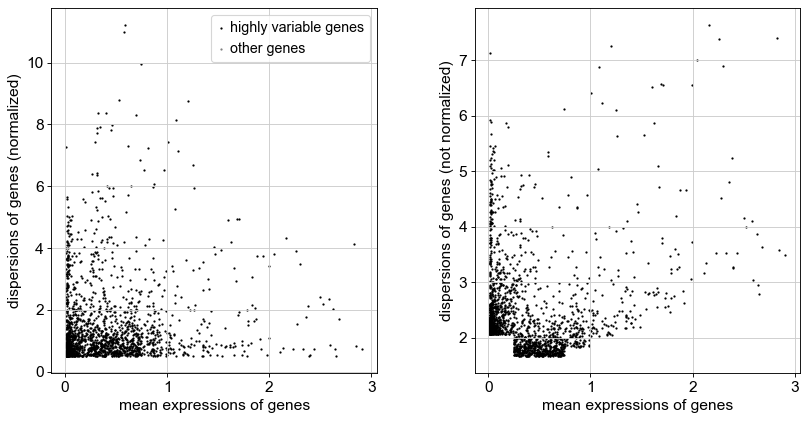

In [20]:
#plotting the highly variable genes
sc.pl.highly_variable_genes(concat_adata)


In [21]:
#regressing out effects of total counts per cell and the percentage of mitochondrial genes expressed
#scaling the data to unit variance
#sc.pp.regress_out(concat_adata, ['total_counts', 'pct_counts_mt'])

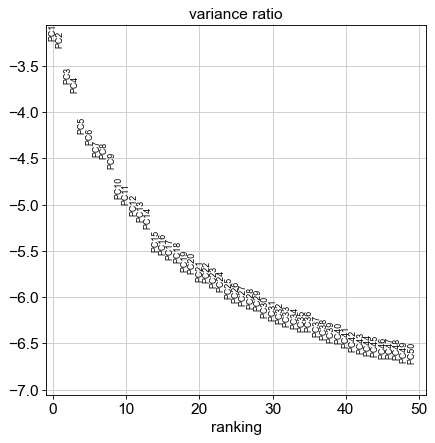

In [22]:
sc.pl.pca_variance_ratio(concat_adata, log=True, n_pcs = 50)
#look for the elbow to determine n_pcs

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8942 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8942 missing from current font.
  font.set_text(s, 0, flags=flags)


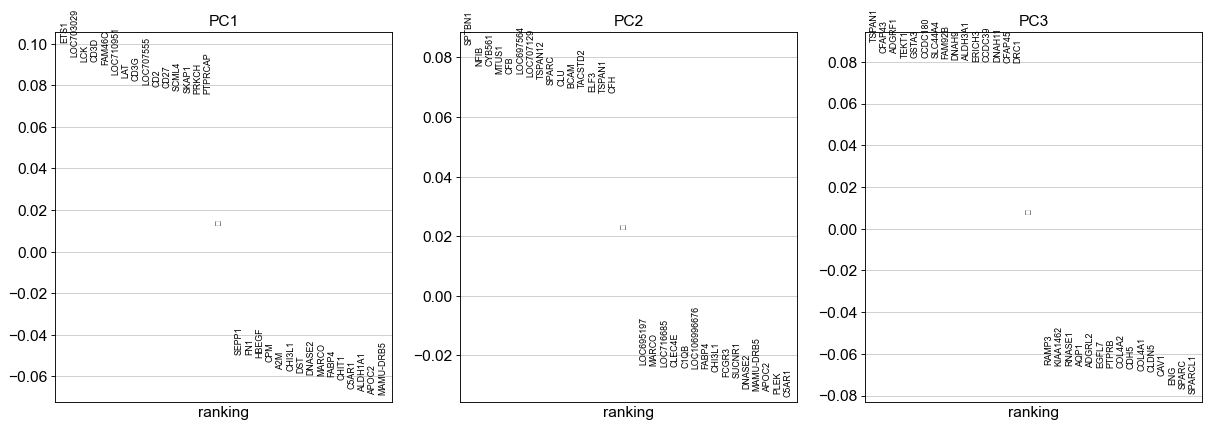

In [23]:
sc.pl.pca_loadings(concat_adata)

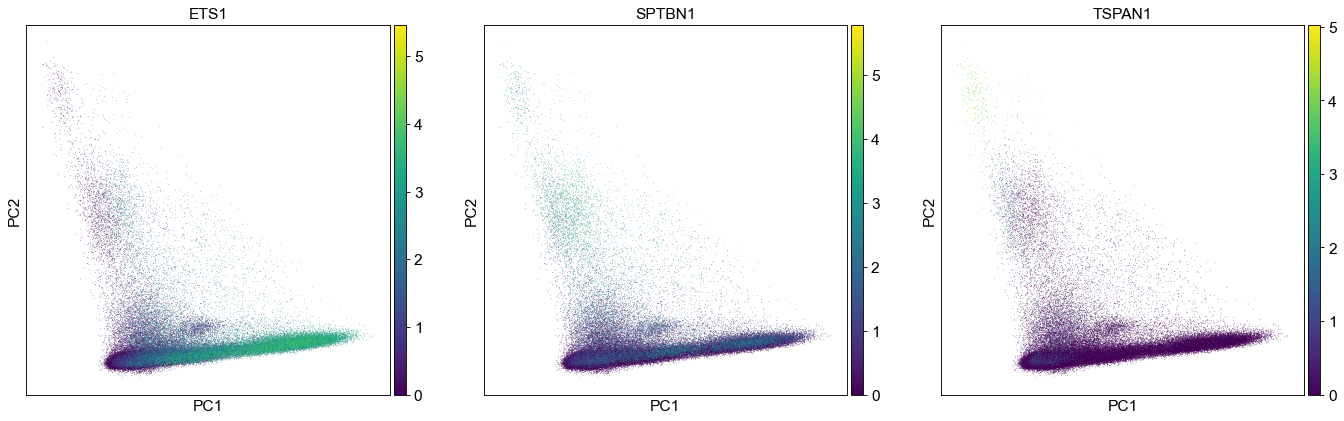

In [24]:
#top 3 genes associated with each PC
sc.pl.pca(concat_adata, color=['ETS1','SPTBN1','TSPAN1'])

In [25]:
#using the leiden clustering method
sc.tl.leiden(concat_adata, resolution = 0.5)


running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:31)


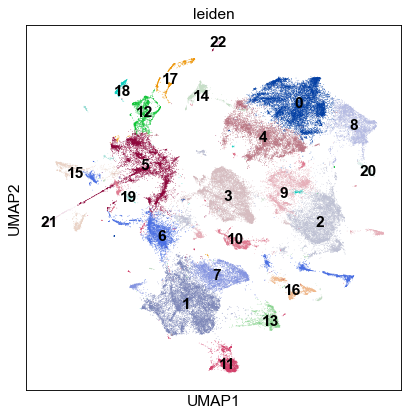

In [26]:
#adata.write(results_file)#plotting the results
sc.pl.umap(concat_adata, color=['leiden'], legend_loc='on data')

In [27]:
# first you might want to set some colors for your groups (like celltype, condition, donor, etc)


def set_colors_from_dict(adata, colordict, group_name):
    '''
    adata - a scanpy adata object
    colordict - dictionary of all values of group_name mapped to hex formatted color
    group_name - a column name of adata.obs which contains values that are the keys of colordict
    '''
    adata.obs[group_name] = adata.obs[group_name].astype("category") 
    group_values_ordered = list(adata.obs[group_name].cat.categories)
    adata.uns[group_name+"_colors"] = [colordict[i] for i in group_values_ordered]


In [28]:
#for example, if I have 3 conditions, CD8a, CD8b, IgG and they are called "treatment" in my adata.obs
# I can check the possible values of "treatment" like this
concat_adata.obs["Group/Study"].unique()

['BCG IV - CD4 Depletion', 'BCG IV - CD8_ Depletion', 'BCG IV - IgG', 'BCG IV - Non Vax', 'BCG IV - Saline', NaN]
Categories (5, object): ['BCG IV - CD4 Depletion', 'BCG IV - CD8_ Depletion', 'BCG IV - IgG', 'BCG IV - Non Vax', 'BCG IV - Saline']

<AxesSubplot:title={'center':'Group/Study'}, xlabel='UMAP1', ylabel='UMAP2'>

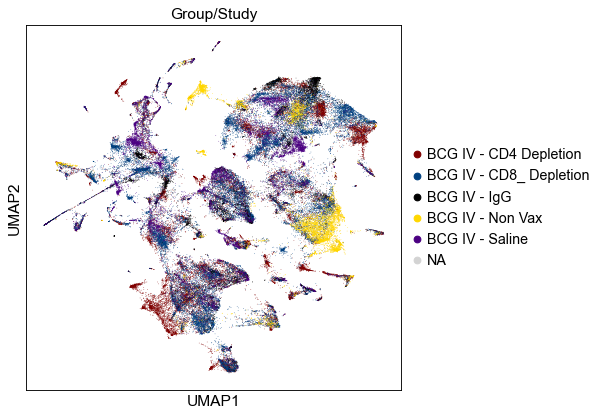

In [29]:
# then I can make a dictionary mapping the possible values to colors
#cd4 = maroon, cd8 = blue, igG (control) = black, saline (control) = indigo, nonvax = yellow
group_study_dict = {"BCG IV - CD4 Depletion":'#800000', "BCG IV - CD8_ Depletion":'#004080', "BCG IV - IgG":'#000000',"BCG IV - Non Vax":'#FFD700',"BCG IV - Saline":'#4B0082'}

# and I can save these colors in the scanpy adata object

set_colors_from_dict(concat_adata, group_study_dict, "Group/Study")

# and check that the colors were correctly saved:

sc.pl.umap(concat_adata, color="Group/Study", show=False)

# then I might want to do this again for celltype, monkey, etc

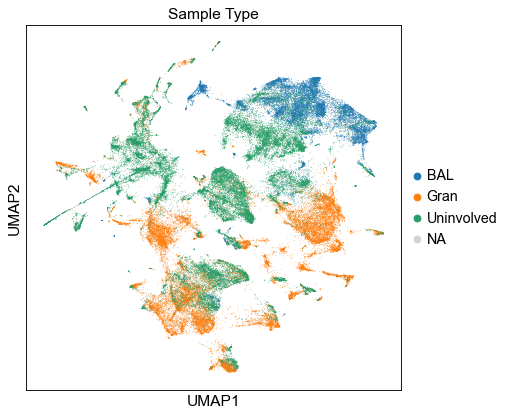

In [30]:
sc.pl.umap(concat_adata, color=['Sample Type'])

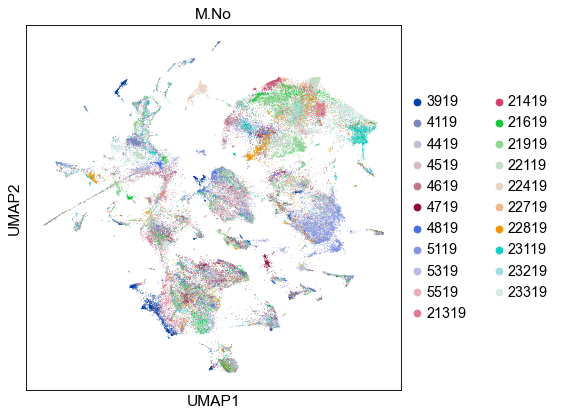

In [31]:
sc.pl.umap(concat_adata, color=['M.No'])

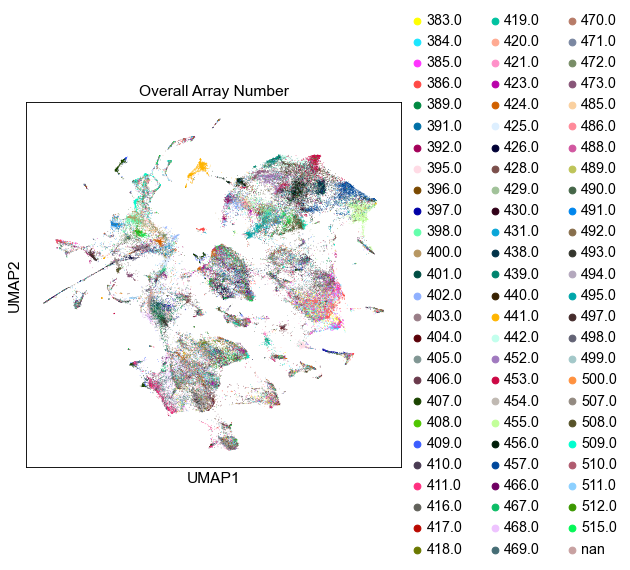

In [32]:
sc.pl.umap(concat_adata, color=['Overall Array Number'])

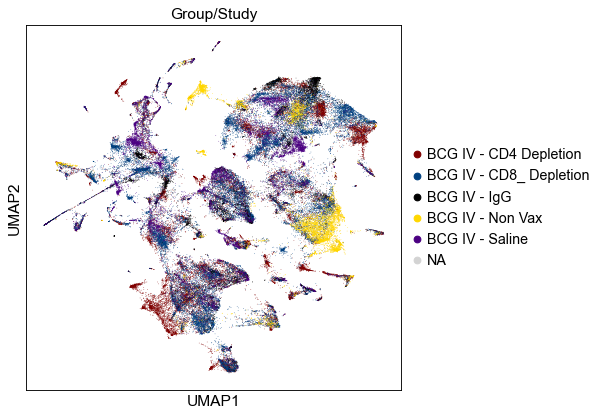

In [33]:
sc.pl.umap(concat_adata, color=['Group/Study'])

In [34]:
sc.tl.rank_genes_groups(concat_adata, 'leiden', method='t-test',pts=True)
# # the "standard_scale="var"" parameter means that the colors are normalized in each column here, so it is easier to see the contrast in expression for a given gene (columns) across groups (rows)
# ax=sc.pl.rank_genes_groups_dotplot(concat_adata,n_genes=3,show=False,key="rank_genes_groups_filtered",standard_scale="var",colorbar_title='Standardized mean\nexpression in group')


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:06:33)


In [35]:
# # ax=sc.pl.rank_genes_groups_dotplot(
# concat_adata,n_genes=3,show=False,key="rank_genes_groups_filtered",standard_scale="var")


In [36]:
# pd.DataFrame(concat_adata.uns["rank_genes_groups"]["pts"]).head(5)

In [37]:
# sc.pl.rank_genes_groups(concat_adata, n_genes=25, sharey=False)

In [38]:
# for I in pd.DataFrame(concat_adata.uns['rank_genes_groups']['names']).head(25)["0"].values:
#     print(I)

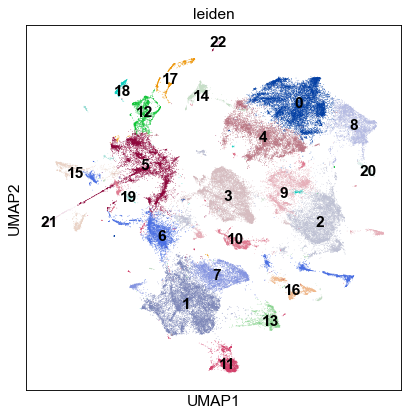

In [39]:
sc.pl.umap(concat_adata, color=['leiden'], legend_loc='on data')

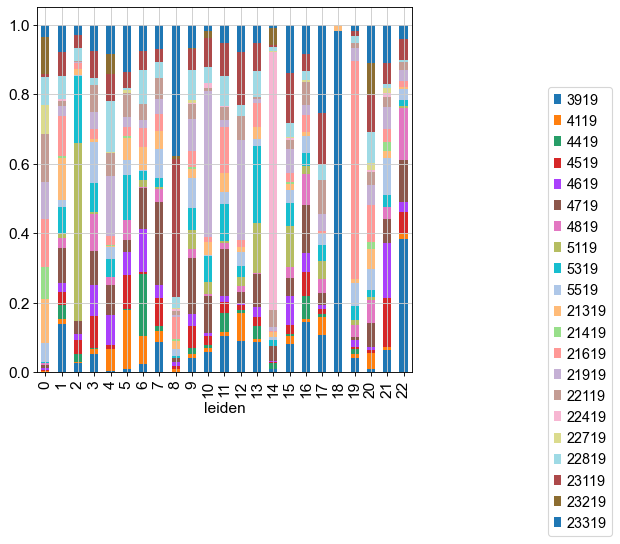

In [40]:
#stacked bar plot wth monkey numbers per clusters
tmp = pd.crosstab(concat_adata.obs['leiden'],concat_adata.obs['M.No'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))

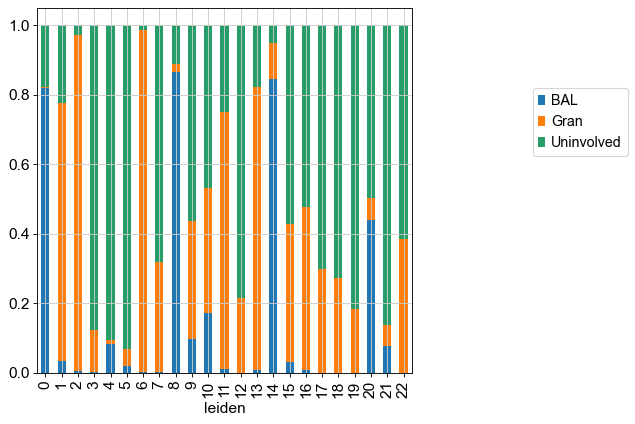

In [41]:
#stacked bar plot wth monkey numbers per clusters
tmp = pd.crosstab(concat_adata.obs['leiden'],concat_adata.obs['Sample Type'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))

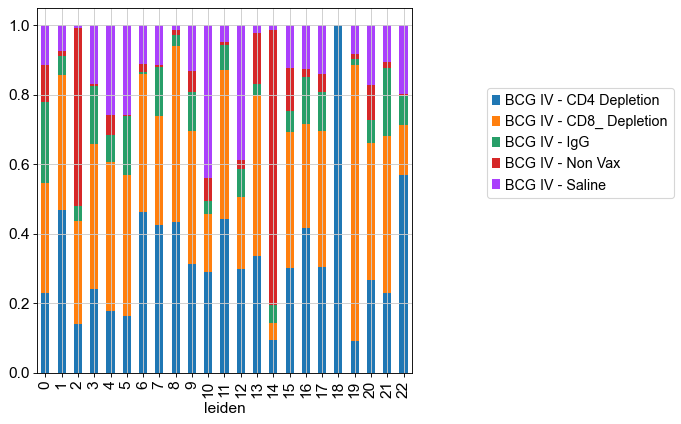

In [42]:
#stacked bar plot wth monkey numbers per clusters
tmp = pd.crosstab(concat_adata.obs['leiden'],concat_adata.obs['Group/Study'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))

# Marker genes

In [59]:
Markers = {'T/NK cells':["CD6","CD2","CD3D","GZMH","RGS9","GNLY","PRF1","NKG7","SYNE1","MKI67"],
           'B cells':["MS4A1","CXCR5","FCRL1","CD37","PAX5","CSNK1G3","CD1C","MKNK2","BLK","SMC6"],
          'Fibroblasts':["COL6A1","LAMB1","COL6A3","COL3A1","DKK3","SLIT3","COL1A2","MFAP4","COL5A2","CCDC80"],
          'Macrophages':["MRC1","FABP4","LTA4H","ABCG1","CHIT1","C1QA","PSME2","EREG","LILRB1","INSIG1"],
            'Mast':["CPA3","MS4A2","KIT","SLC18A2","ADCYAP1","LOC699599","FCER1A","AHR","PRSS57","SLC45A3"],
           'Neutrophils':["CLEC4E","SELL","MXD1","ZCCHC6","VASP","IRF1","AIM2","USP15","RASSF2"],
           'Secretory Epithelial Cells':["SCGB1A1","SCGB3A1","SCGB3A2","TMC5","DEGS2","SERPINB11","SOX2","BPIFB1","CLCA2","MUC4"],
           'Ciliated Epithial cells':["ERICH3","ARMC3","DNAH9","CFAP43","DNAI1","RSPH1","ARMC4","DNAH11","LOC708629"],
          'Mesothelial':["PRG4","BNC1","RSPO1","PKHD1L1","WT1","LOC715377"]
          }


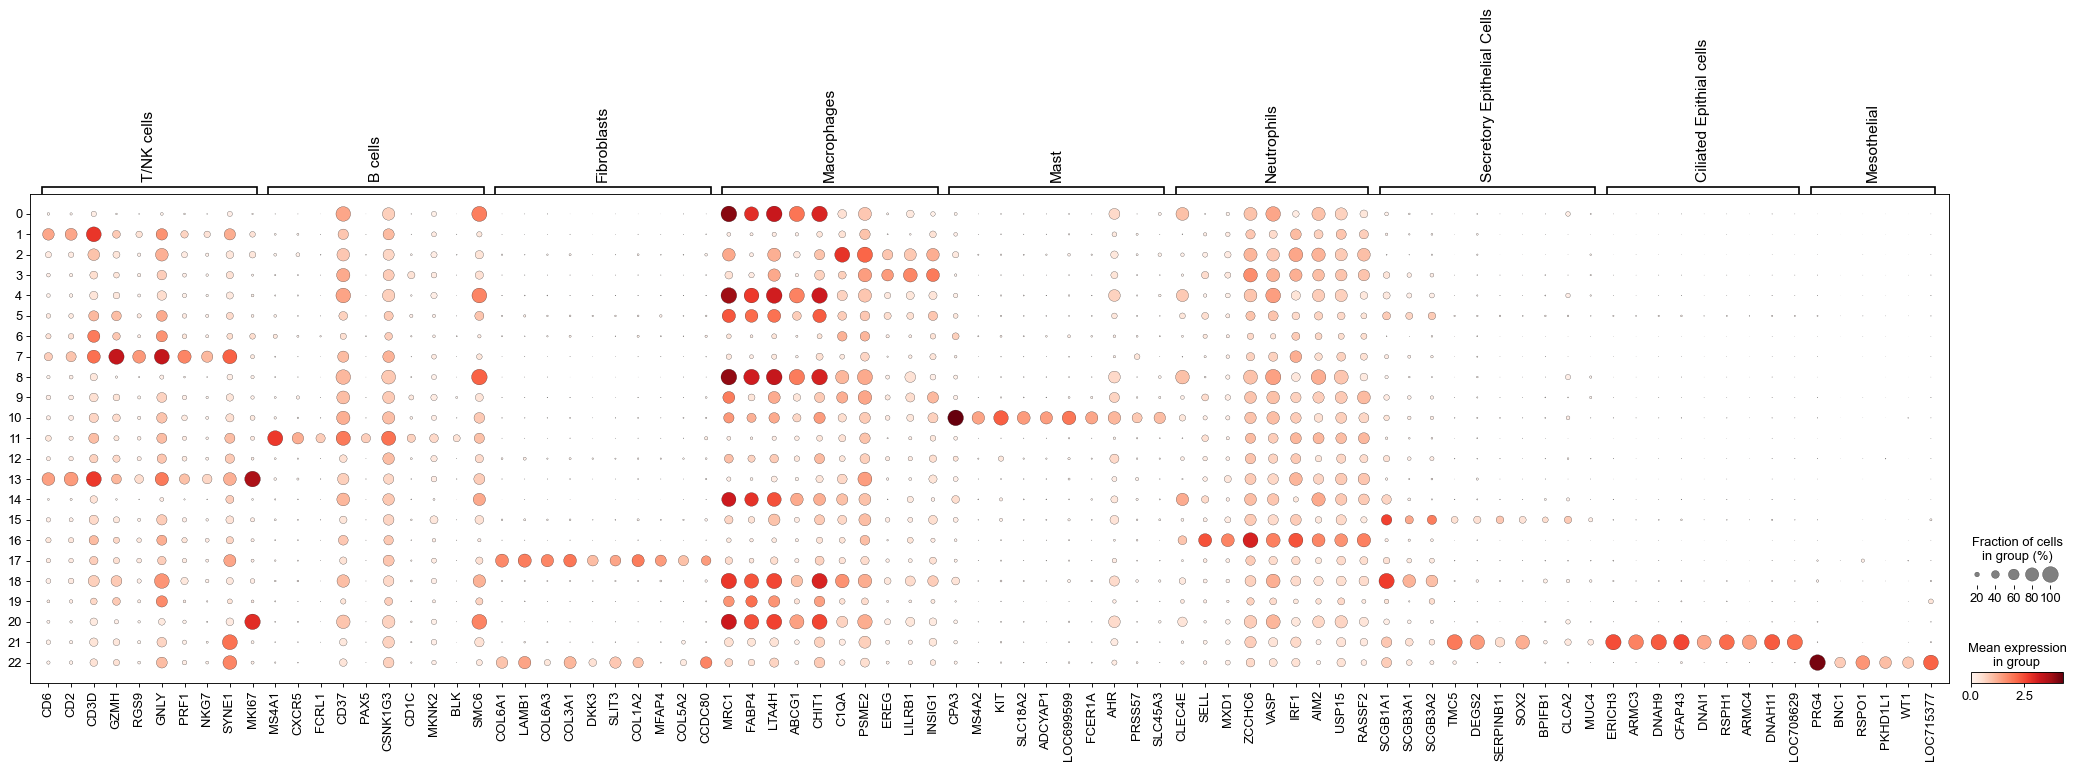

In [60]:
sc.pl.dotplot(concat_adata, Markers, groupby='leiden')

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_utils.py:315: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


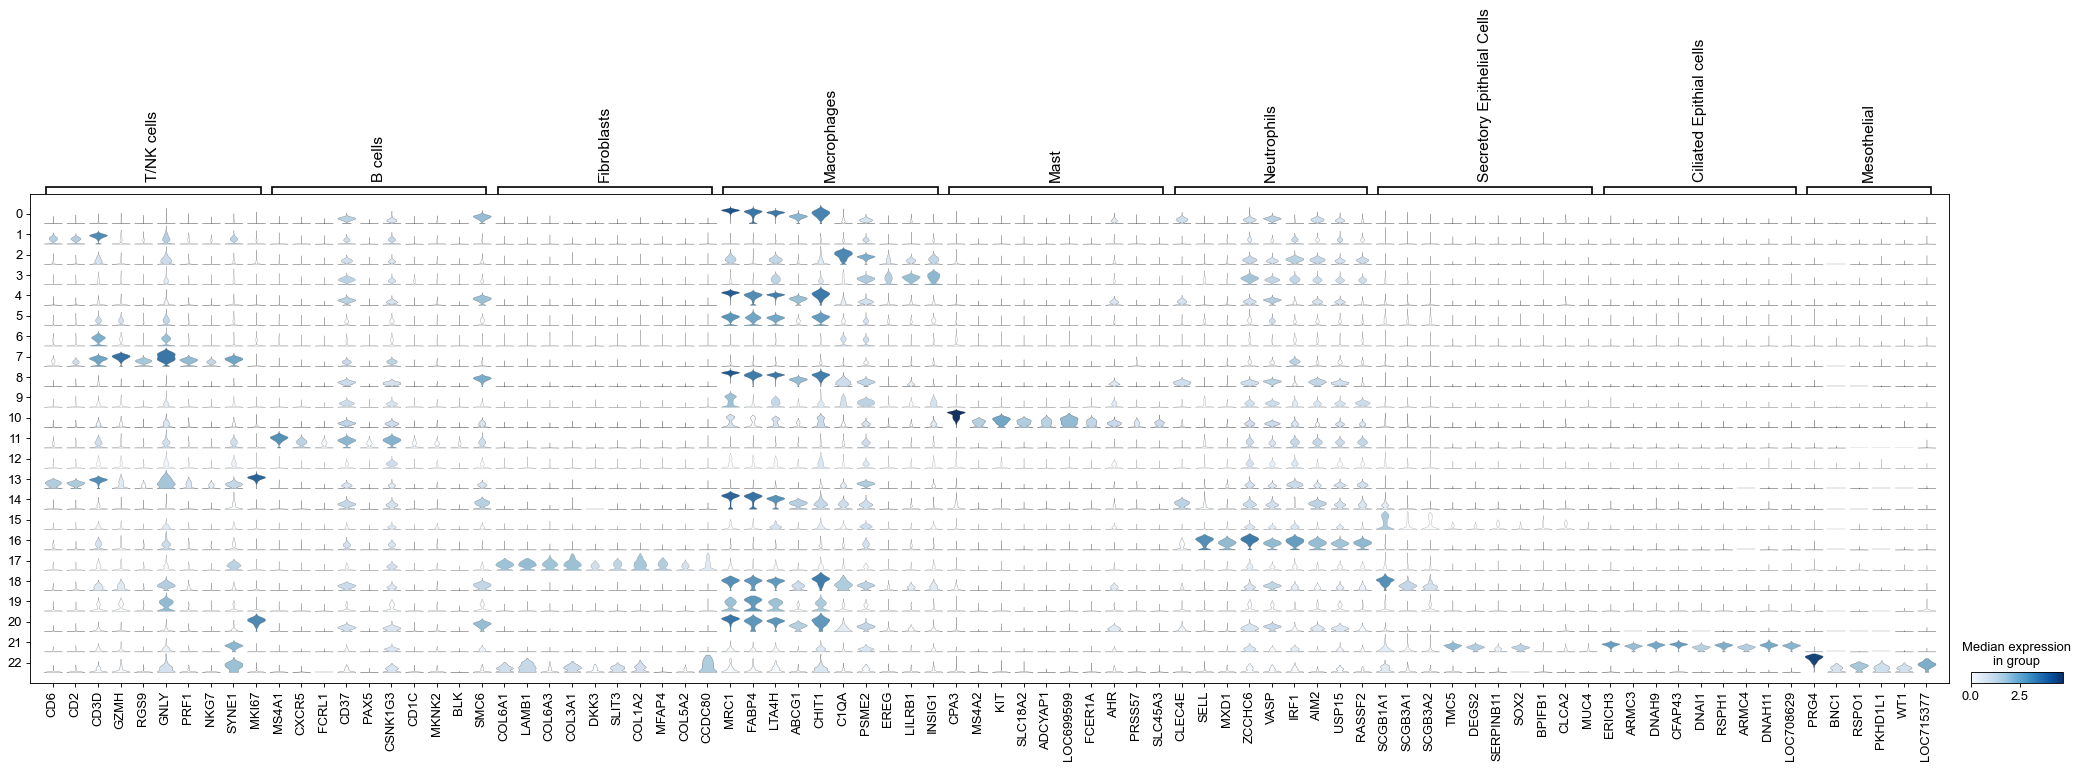

In [65]:
sc.pl.stacked_violin(concat_adata, Markers, groupby='leiden', rotation=90);


In [67]:
cell_annotation = sc.tl.marker_gene_overlap(concat_adata, Markers)
cell_annotation

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    1    2    3    4    5    6    7    8    9  \
T/NK cells                  0.0  3.0  0.0  0.0  0.0  1.0  4.0  7.0  0.0  0.0   
B cells                     1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0   
Fibroblasts                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Macrophages                 5.0  0.0  2.0  3.0  5.0  6.0  1.0  0.0  5.0  0.0   
Mast                        0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
Neutrophils                 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
Secretory Epithelial Cells  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0   
Ciliated Epithial cells     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Mesothelial                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                            ...   13   14   15   16    17   18   19   20   21  \
T/NK cells                  ...  3.0  0.0  0.0  0.0   0.0  0.0  1.0  1.0  0.0   
B cells                     ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  1.0  0.0   
Fibroblasts                 ...  0.0  0.0  0.0  0.0  10.0  0.0  0.0  0.0  0.0   
Macrophages                 ...  0.0  3.0  0.0  0.0   0.0  4.0  1.0  2.0  0.0   
Mast                        ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
Neutrophils                 ...  0.0  1.0  0.0  8.0   0.0  0.0  0.0  0.0  0.0   
Secretory Epithelial Cells  ...  0.0  0.0  0.0  0.0   0.0  2.0  0.0  0.0  2.0   
Ciliated Epithial cells     ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  8.0   
Mesothelial                 ...  0.0  0.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0   

                             22  
T/NK cells                  0.0  
B cells                     0.0  
Fibroblasts                 2.0  
Macrophages                 0.0  
Mast                        0.0  
Neutrophils                 0.0  
Secretory Epithelial Cells  0.0  
Ciliated Epithial cells     0.0  
Mesothelial                 4.0  

[9 rows x 23 columns]

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

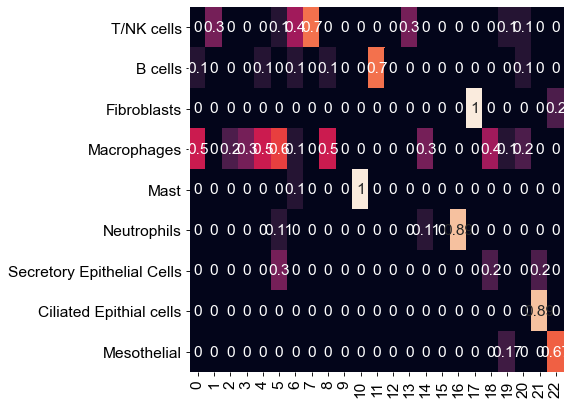

In [71]:
# We can also visualize the marker gene overlap as a fraction of the total
#marker genes, and then plot this as a heatmap for simpler cell identity 
#annotation.fraction of known marker genes that are found in the cluster 
#marker gene sets from the rank_genes_groups() function. This allows us 
#to clearly identify tuft cells, enteroendocrine cells, paneth cells, 
#enterocytes, and stem cells.

cell_annotation_norm = sc.tl.marker_gene_overlap(concat_adata, Markers, normalize='reference')
sb.heatmap(cell_annotation_norm, cbar=False, annot=True)

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_utils.py:315: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


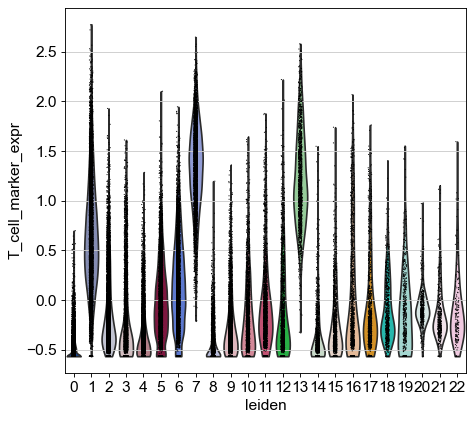

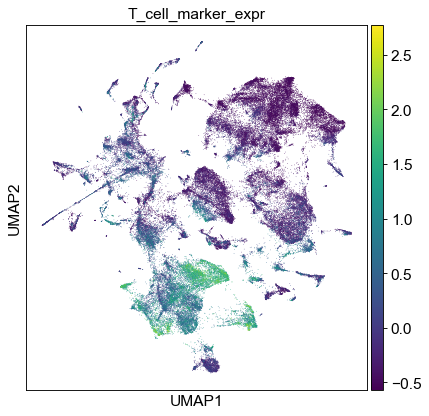

In [74]:
# Check expression of specific cell type markers
#Collate all T/NK markers and get the gene IDs in the data set
ids_tcell = np.in1d(concat_adata.var_names, Markers['T/NK cells'])
# ids_entdist = np.in1d(concat_adata.var_names, Markers['Enterocyte (Distal)'])
# ids_ent = np.logical_or(ids_entprox, ids_entdist)

#Calculate the mean expression of enterocyte markers
concat_adata.obs['T_cell_marker_expr'] = concat_adata.X[:,ids_tcell].mean(1)

#Plot enterocyte expression
sc.pl.violin(concat_adata, 'T_cell_marker_expr', groupby='leiden')
sc.pl.umap(concat_adata, color='T_cell_marker_expr')

In [ ]:
# Check expression of specific cell type markers
#Collate all T/NK markers and get the gene IDs in the data set
ids_tcell = np.in1d(concat_adata.var_names, Markers['T/NK cells'])
# ids_entdist = np.in1d(concat_adata.var_names, Markers['Enterocyte (Distal)'])
# ids_ent = np.logical_or(ids_entprox, ids_entdist)

#Calculate the mean expression of enterocyte markers
concat_adata.obs['T_cell_marker_expr'] = concat_adata.X[:,ids_tcell].mean(1)

#Plot enterocyte expression
sc.pl.violin(concat_adata, 'T_cell_marker_expr', groupby='leiden')
sc.pl.umap(concat_adata, color='T_cell_marker_expr')

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_utils.py:315: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


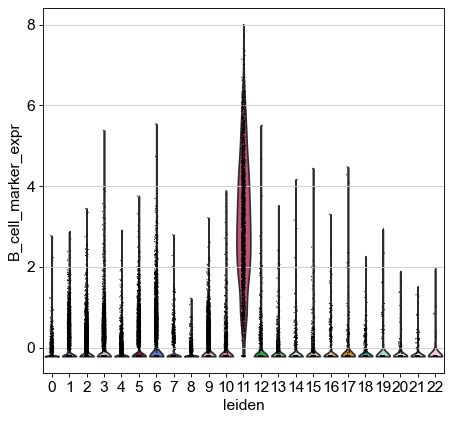

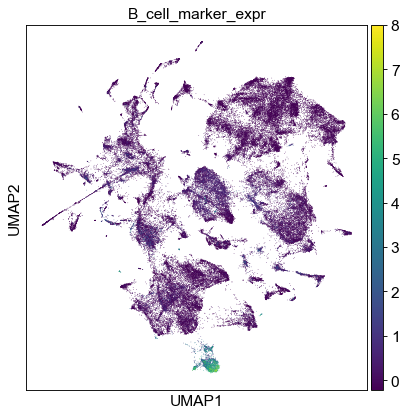

In [96]:
# Check expression of specific cell type markers
#Collate all B markers and get the gene IDs in the data set
ids_tcell = np.in1d(concat_adata.var_names, Markers['B cells'])
# ids_entdist = np.in1d(concat_adata.var_names, Markers['Enterocyte (Distal)'])
# ids_ent = np.logical_or(ids_entprox, ids_entdist)

#Calculate the mean expression of enterocyte markers
concat_adata.obs['B_cell_marker_expr'] = concat_adata.X[:,ids_tcell].mean(1)

#Plot enterocyte expression
sc.pl.violin(concat_adata, 'B_cell_marker_expr', groupby='leiden')
sc.pl.umap(concat_adata, color='B_cell_marker_expr')

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_utils.py:315: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


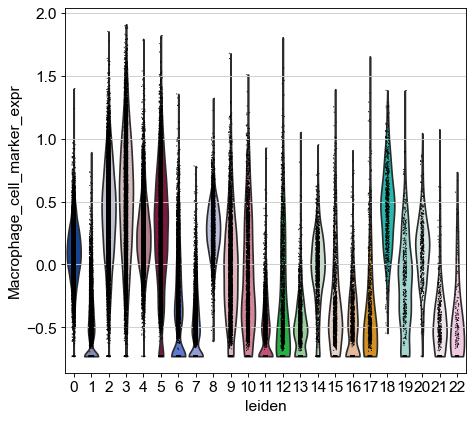

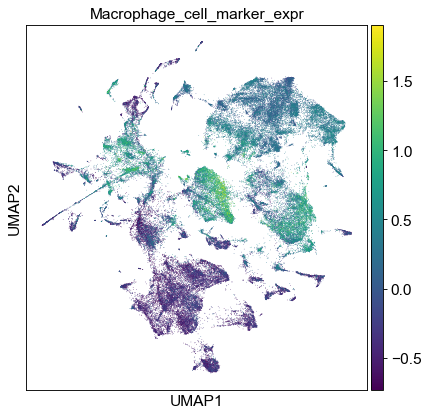

In [97]:
# Check expression of specific cell type markers
#Collate all T/NK markers and get the gene IDs in the data set
ids_tcell = np.in1d(concat_adata.var_names, Markers['Macrophages'])
# ids_entdist = np.in1d(concat_adata.var_names, Markers['Enterocyte (Distal)'])
# ids_ent = np.logical_or(ids_entprox, ids_entdist)

#Calculate the mean expression of enterocyte markers
concat_adata.obs['Macrophage_cell_marker_expr'] = concat_adata.X[:,ids_tcell].mean(1)

#Plot enterocyte expression
sc.pl.violin(concat_adata, 'Macrophage_cell_marker_expr', groupby='leiden')
sc.pl.umap(concat_adata, color='Macrophage_cell_marker_expr')

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_utils.py:315: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


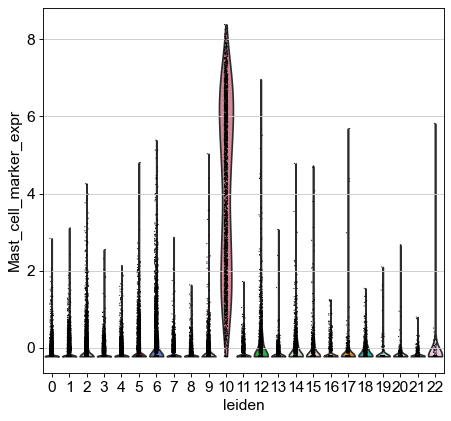

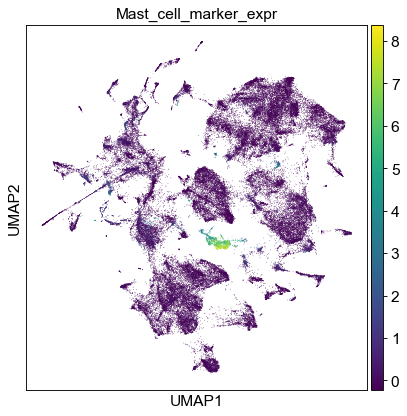

In [104]:
# Check expression of specific cell type markers
#Collate all T/NK markers and get the gene IDs in the data set
ids_tcell = np.in1d(concat_adata.var_names, Markers['Mast'])
# ids_entdist = np.in1d(concat_adata.var_names, Markers['Enterocyte (Distal)'])
# ids_ent = np.logical_or(ids_entprox, ids_entdist)

#Calculate the mean expression of enterocyte markers
concat_adata.obs['Mast_cell_marker_expr'] = concat_adata.X[:,ids_tcell].mean(1)

#Plot enterocyte expression
sc.pl.violin(concat_adata, 'Mast_cell_marker_expr', groupby='leiden')
sc.pl.umap(concat_adata, color='Mast_cell_marker_expr')

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_utils.py:315: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


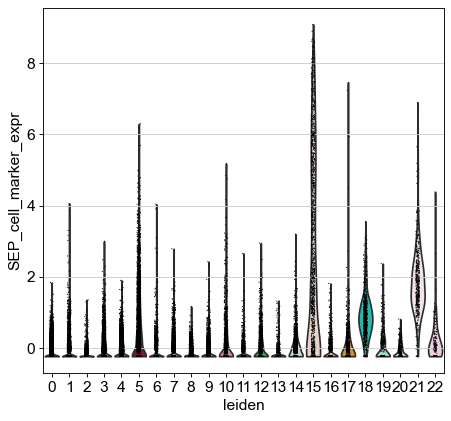

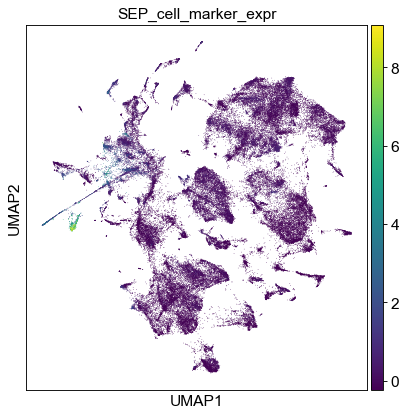

In [105]:
# Check expression of specific cell type markers
#Collate all T/NK markers and get the gene IDs in the data set
ids_tcell = np.in1d(concat_adata.var_names, Markers['Secretory Epithelial Cells'])
# ids_entdist = np.in1d(concat_adata.var_names, Markers['Enterocyte (Distal)'])
# ids_ent = np.logical_or(ids_entprox, ids_entdist)

#Calculate the mean expression of enterocyte markers
concat_adata.obs['SEP_cell_marker_expr'] = concat_adata.X[:,ids_tcell].mean(1)

#Plot enterocyte expression
sc.pl.violin(concat_adata, 'SEP_cell_marker_expr', groupby='leiden')
sc.pl.umap(concat_adata, color='SEP_cell_marker_expr')

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_utils.py:315: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


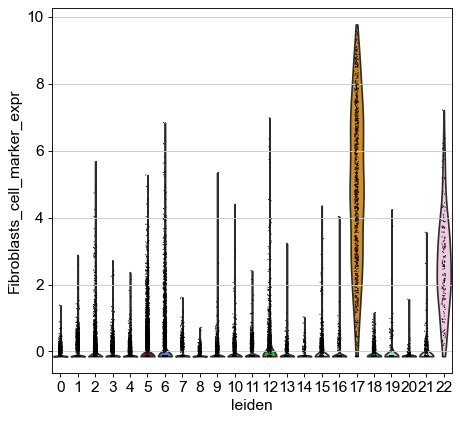

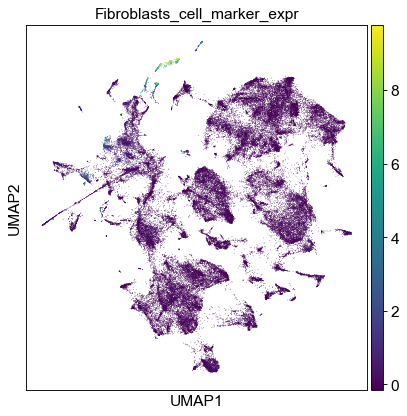

In [98]:
# Check expression of specific cell type markers
#Collate all T/NK markers and get the gene IDs in the data set
ids_tcell = np.in1d(concat_adata.var_names, Markers['Fibroblasts'])
# ids_entdist = np.in1d(concat_adata.var_names, Markers['Enterocyte (Distal)'])
# ids_ent = np.logical_or(ids_entprox, ids_entdist)

#Calculate the mean expression of enterocyte markers
concat_adata.obs['Fibroblasts_cell_marker_expr'] = concat_adata.X[:,ids_tcell].mean(1)

#Plot enterocyte expression
sc.pl.violin(concat_adata, 'Fibroblasts_cell_marker_expr', groupby='leiden')
sc.pl.umap(concat_adata, color='Fibroblasts_cell_marker_expr')

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_utils.py:315: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


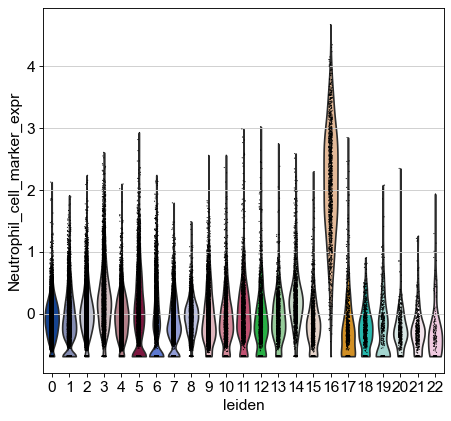

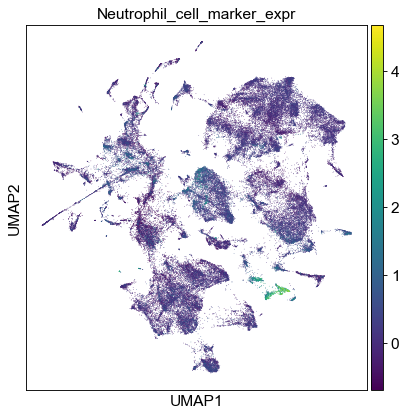

In [99]:
# Check expression of specific cell type markers
#Collate all T/NK markers and get the gene IDs in the data set
ids_tcell = np.in1d(concat_adata.var_names, Markers['Neutrophils'])
# ids_entdist = np.in1d(concat_adata.var_names, Markers['Enterocyte (Distal)'])
# ids_ent = np.logical_or(ids_entprox, ids_entdist)

#Calculate the mean expression of enterocyte markers
concat_adata.obs['Neutrophil_cell_marker_expr'] = concat_adata.X[:,ids_tcell].mean(1)

#Plot enterocyte expression
sc.pl.violin(concat_adata, 'Neutrophil_cell_marker_expr', groupby='leiden')
sc.pl.umap(concat_adata, color='Neutrophil_cell_marker_expr')

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_utils.py:315: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


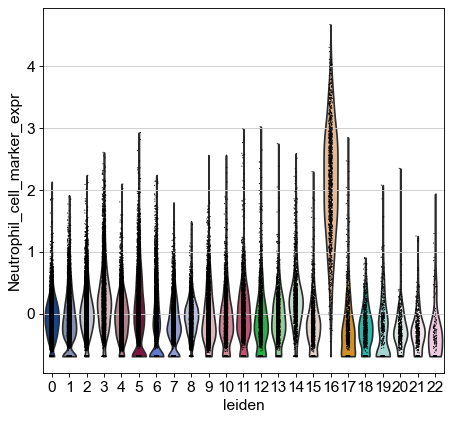

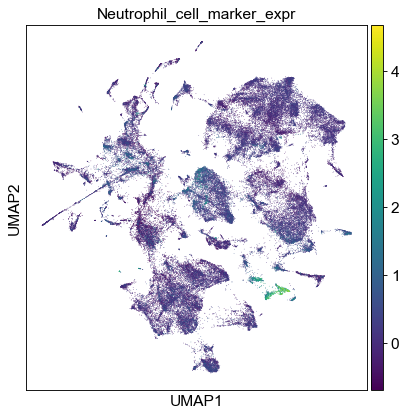

In [102]:
# Check expression of specific cell type markers
#Collate all T/NK markers and get the gene IDs in the data set
ids_tcell = np.in1d(concat_adata.var_names, Markers['Neutrophils'])
# ids_entdist = np.in1d(concat_adata.var_names, Markers['Enterocyte (Distal)'])
# ids_ent = np.logical_or(ids_entprox, ids_entdist)

#Calculate the mean expression of enterocyte markers
concat_adata.obs['Neutrophil_cell_marker_expr'] = concat_adata.X[:,ids_tcell].mean(1)

#Plot enterocyte expression
sc.pl.violin(concat_adata, 'Neutrophil_cell_marker_expr', groupby='leiden')
sc.pl.umap(concat_adata, color='Neutrophil_cell_marker_expr')

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_utils.py:315: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


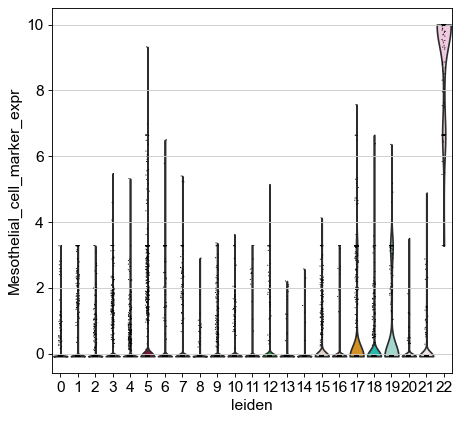

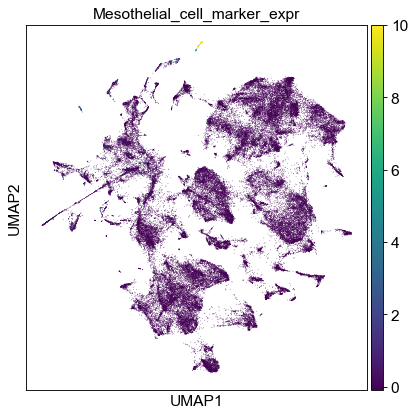

In [100]:
# Check expression of specific cell type markers
#Collate all T/NK markers and get the gene IDs in the data set
ids_tcell = np.in1d(concat_adata.var_names, Markers['Mesothelial'])
# ids_entdist = np.in1d(concat_adata.var_names, Markers['Enterocyte (Distal)'])
# ids_ent = np.logical_or(ids_entprox, ids_entdist)

#Calculate the mean expression of enterocyte markers
concat_adata.obs['Mesothelial_cell_marker_expr'] = concat_adata.X[:,ids_tcell].mean(1)

#Plot enterocyte expression
sc.pl.violin(concat_adata, 'Mesothelial_cell_marker_expr', groupby='leiden')
sc.pl.umap(concat_adata, color='Mesothelial_cell_marker_expr')

/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tmj23/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_utils.py:315: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


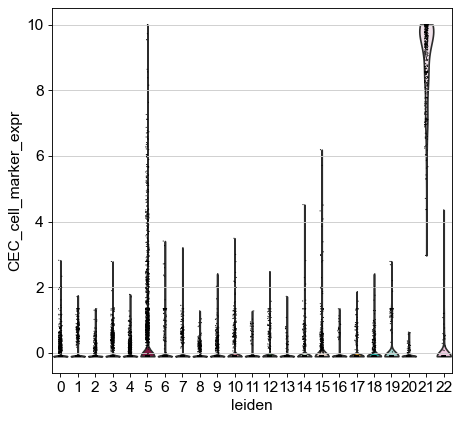

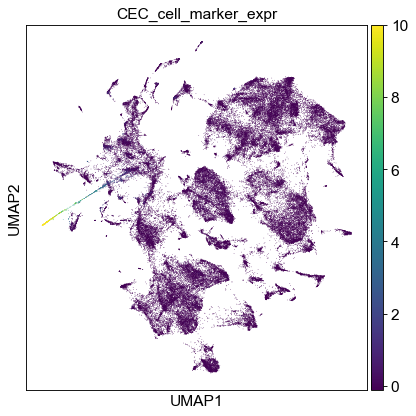

In [103]:
# Check expression of specific cell type markers
#Collate all T/NK markers and get the gene IDs in the data set
ids_tcell = np.in1d(concat_adata.var_names, Markers['Ciliated Epithial cells'])
# ids_entdist = np.in1d(concat_adata.var_names, Markers['Enterocyte (Distal)'])
# ids_ent = np.logical_or(ids_entprox, ids_entdist)

#Calculate the mean expression of enterocyte markers
concat_adata.obs['CEC_cell_marker_expr'] = concat_adata.X[:,ids_tcell].mean(1)

#Plot enterocyte expression
sc.pl.violin(concat_adata, 'CEC_cell_marker_expr', groupby='leiden')
sc.pl.umap(concat_adata, color='CEC_cell_marker_expr')

In [121]:
## renaming clusters based on the top genes from the filtering percent expressing genes
new_cluster_names = ['Monocytes 1','T cells 1', 'Monocytes 2','Monocytes 3', 'Monocytes 4',
                     'Monocytes 5','T cells 2','T cells 3','Monocytes 6','Monocytes 7','Mast cells',
                    'B cells', 'Endothelial','Monocytes 8','Monocytes 9','Pulmonary alveloar Type II',
                    'Neutrophils','Fibroblasts','Non-immune 1','Non-immune 2', 'Monocytes 10',
                    'Ciliated epithelial cells', 'Mesothelial']
concat_adata.rename_categories('leiden', new_cluster_names)

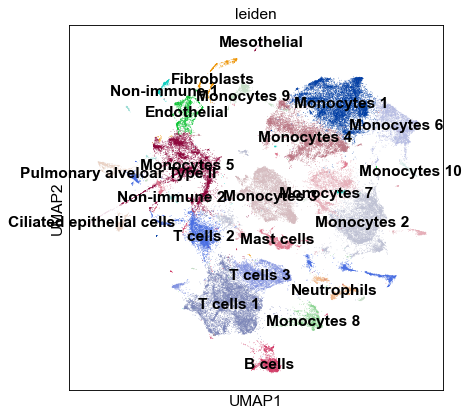

In [124]:
sc.pl.umap(concat_adata, color=['leiden'], legend_loc='on data')

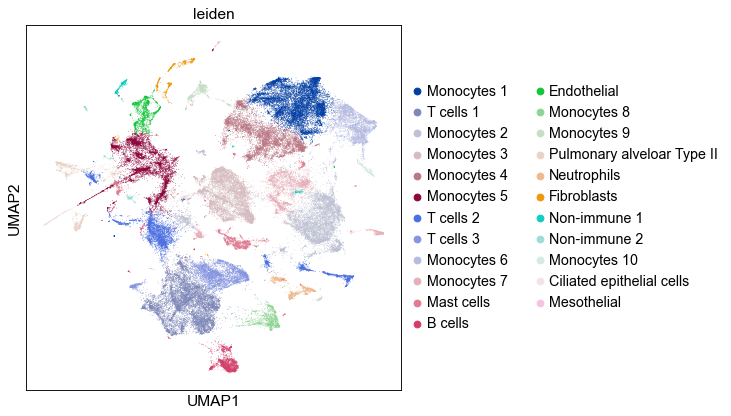

In [123]:
sc.pl.umap(concat_adata, color=['leiden'])

# Subclustering T cells

In [73]:
# create a place where all cells are unassigned/nameless, this then allows you to subcluster, 
#assign new names cellular identities, and then save your new names (ie T cells identities)
#to your larger anndata object. 
# concat_adata.obs['Subclustering'] = np.nan

In [84]:
# T_cells = concat_adata[concat_adata.obs['leiden'].isin(["10"])]
# Monocytes = concat_adata[concat_adata.obs['leiden'].isin(["0","2","3","4","5","8","9","13","14","20"])]
# Non_immune = concat_adata[concat_adata.obs['leiden'].isin(["18","19"])]

In [94]:
T_cells = sc.AnnData(concat_adata.raw.X, obs=concat_adata.obs, var=concat_adata.raw.var, uns=concat_adata.uns)


In [95]:
# T_cells = T_cells[T_cells.obs['Subclustering'].isin(['T_cells']), :]
T_cells = T_cells[T_cells.obs['leiden'].isin(["1","6","7"]), :] 

In [96]:
T_cells

View of AnnData object with n_obs × n_vars = 21929 × 29856
    obs: 'sample', 'M.No', 'Gran info', 'Sample Type', 'Overall Array Number', 'Total number of cells', 'Group/Study', 'CFU Total', 'n_genes', 'n_genes_by_counts', 'total_counts', 'leiden', 'Subclustering'
    var: 'total_expression', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'M.No_colors', 'hvg', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'Group/Study_colors', 'Sample Type_colors', 'Overall Array Number_colors', 'rank_genes_groups'

In [97]:
#adata_raw = adata_raw[:,~adata_raw.var[‘Combined_Blacklist’]]
sc.pp.filter_genes(T_cells, min_cells=10)    

filtered out 9240 genes that are detected in less than 10 cells
Trying to set attribute `.var` of view, copying.


In [98]:
T_cells

AnnData object with n_obs × n_vars = 21929 × 20616
    obs: 'sample', 'M.No', 'Gran info', 'Sample Type', 'Overall Array Number', 'Total number of cells', 'Group/Study', 'CFU Total', 'n_genes', 'n_genes_by_counts', 'total_counts', 'leiden', 'Subclustering'
    var: 'total_expression', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'M.No_colors', 'hvg', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'Group/Study_colors', 'Sample Type_colors', 'Overall Array Number_colors', 'rank_genes_groups'

In [99]:
sc.pp.normalize_per_cell(T_cells, counts_per_cell_after=10000)
sc.pp.log1p(T_cells) 

normalizing by total count per cell
    finished (0:00:02): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [100]:
T_cells

AnnData object with n_obs × n_vars = 21929 × 20616
    obs: 'sample', 'M.No', 'Gran info', 'Sample Type', 'Overall Array Number', 'Total number of cells', 'Group/Study', 'CFU Total', 'n_genes', 'n_genes_by_counts', 'total_counts', 'leiden', 'Subclustering', 'n_counts'
    var: 'total_expression', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'M.No_colors', 'hvg', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'Group/Study_colors', 'Sample Type_colors', 'Overall Array Number_colors', 'rank_genes_groups', 'log1p'

In [101]:
# sc.pl.umap(T_cells, color=['leiden'], legend_loc='on data')

In [102]:
#identify highly variable genes
# sc.pp.highly_variable_genes(T_cells, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(T_cells, n_top_genes = 2500)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [103]:
#freezing the normalized and logarithmic state of the annobjects for further analysis
T_cells.raw = T_cells

In [104]:
#filtering
T_cells = T_cells[:, T_cells.var.highly_variable]

In [108]:
T_cells

AnnData object with n_obs × n_vars = 21929 × 2500
    obs: 'sample', 'M.No', 'Gran info', 'Sample Type', 'Overall Array Number', 'Total number of cells', 'Group/Study', 'CFU Total', 'n_genes', 'n_genes_by_counts', 'total_counts', 'leiden', 'Subclustering', 'n_counts'
    var: 'total_expression', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'M.No_colors', 'hvg', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'Group/Study_colors', 'Sample Type_colors', 'Overall Array Number_colors', 'rank_genes_groups', 'log1p'
    obsm: 'X_pca'
    varm: 'PCs'

In [105]:
#scaling each gene to unit variance, remove values exceeding standard deviation 10
T_cells = sc.pp.scale(T_cells, max_value=10, copy = True)

In [109]:
T_cells

AnnData object with n_obs × n_vars = 21929 × 2500
    obs: 'sample', 'M.No', 'Gran info', 'Sample Type', 'Overall Array Number', 'Total number of cells', 'Group/Study', 'CFU Total', 'n_genes', 'n_genes_by_counts', 'total_counts', 'leiden', 'Subclustering', 'n_counts'
    var: 'total_expression', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'M.No_colors', 'hvg', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'Group/Study_colors', 'Sample Type_colors', 'Overall Array Number_colors', 'rank_genes_groups', 'log1p'
    obsm: 'X_pca'
    varm: 'PCs'

In [106]:
# PCA
sc.tl.pca(T_cells, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)


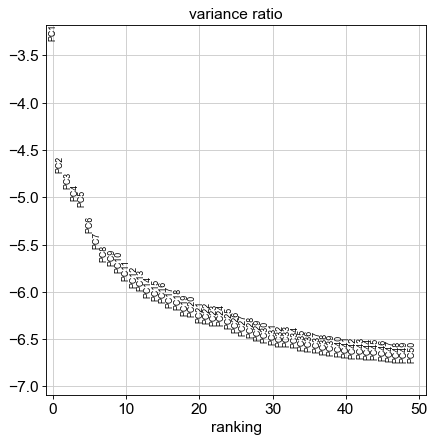

In [107]:
sc.pl.pca_variance_ratio(T_cells, log=True, n_pcs = 50)
#look for the elbow to determine n_pcs

In [110]:
#compute neighbors
sc.pp.neighbors(T_cells, n_neighbors=20, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)


In [111]:
# computes UMAP
sc.tl.umap(T_cells, spread=2, min_dist=0.1, random_state = 1)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


In [112]:
#using the leiden clustering method
sc.tl.leiden(T_cells, resolution = 0.2)


running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


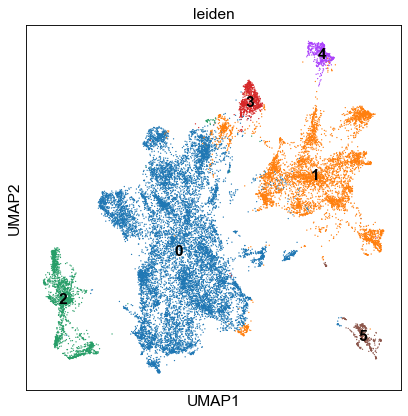

In [113]:
#adata.write(results_file)#plotting the results
sc.pl.umap(T_cells, color=['leiden'],legend_loc='on data')

In [125]:
## renaming clusters based on the top genes from the filtering percent expressing genes
new_cluster_names = ['Monocytes 1','T cells', 'Monocytes 2','Monocytes 3', 'Monocytes 4','Monocytes 5']
T_cells.rename_categories('leiden', new_cluster_names)


Omitting rank_genes_groups/names as old categories do not match.
Omitting rank_genes_groups/scores as old categories do not match.
Omitting rank_genes_groups/pvals as old categories do not match.
Omitting rank_genes_groups/pvals_adj as old categories do not match.
Omitting rank_genes_groups/logfoldchanges as old categories do not match.


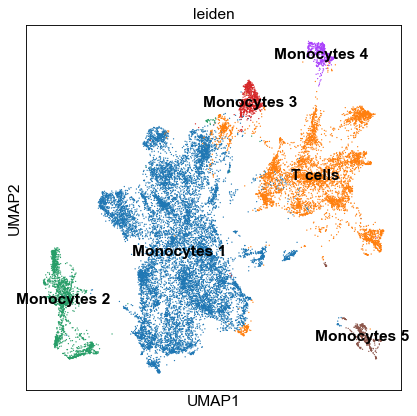

In [126]:
#adata.write(results_file)#plotting the results
sc.pl.umap(T_cells, color=['leiden'],legend_loc='on data')

In [120]:
for I in pd.DataFrame(T_cells.uns['rank_genes_groups']['names']).head(10)["4"].values:
    print(I)

MRC1
ALDH2
LTA4H
PECAM1
OLR1
PSAP
RMDN3
TREM1
CYP27A1
APP


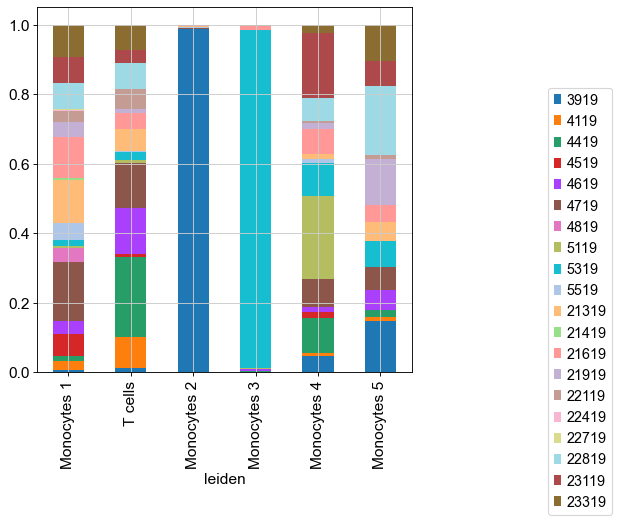

In [143]:
#stacked bar plot wth monkey numbers per clusters
tmp = pd.crosstab(T_cells.obs['leiden'],T_cells.obs['M.No'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))

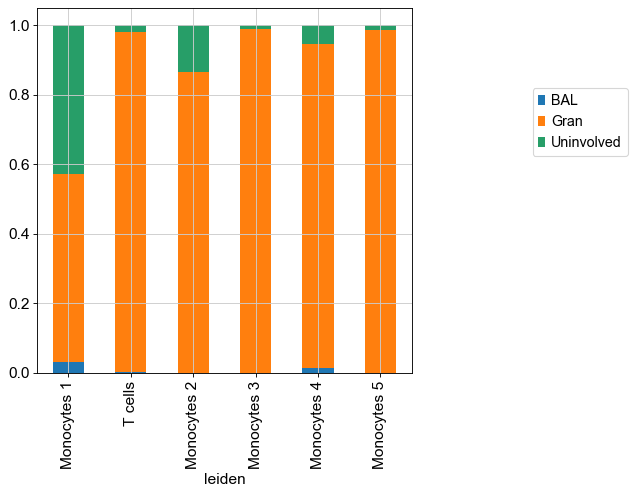

In [144]:
#stacked bar plot wth monkey numbers per clusters
tmp = pd.crosstab(T_cells.obs['leiden'],T_cells.obs['Sample Type'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))

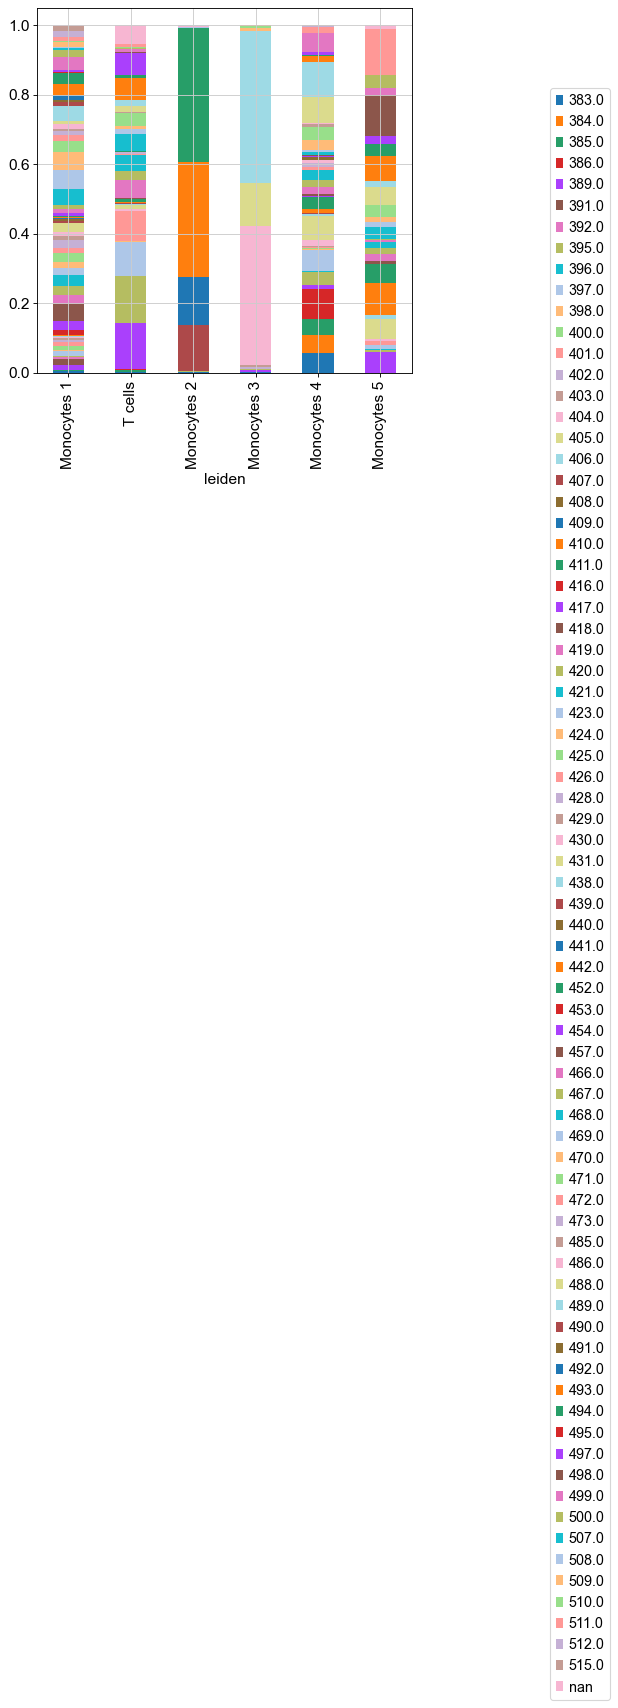

In [146]:
#stacked bar plot wth monkey numbers per clusters
tmp = pd.crosstab(T_cells.obs['leiden'],T_cells.obs['Overall Array Number'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))

In [148]:
# removing monocyte 2 and 3
T_cells_new = T_cells[~T_cells.obs['leiden'].isin(['Monocytes 2','Monocytes 3']),:]

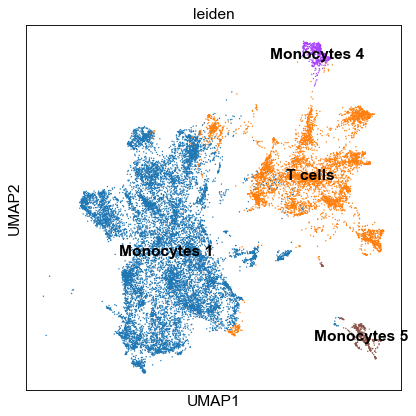

In [149]:
#adata.write(results_file)#plotting the results
sc.pl.umap(T_cells_new, color=['leiden'],legend_loc='on data')

In [150]:
T_cells_new

View of AnnData object with n_obs × n_vars = 19307 × 2500
    obs: 'sample', 'M.No', 'Gran info', 'Sample Type', 'Overall Array Number', 'Total number of cells', 'Group/Study', 'CFU Total', 'n_genes', 'n_genes_by_counts', 'total_counts', 'leiden', 'Subclustering', 'n_counts'
    var: 'total_expression', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'M.No_colors', 'hvg', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'Group/Study_colors', 'Sample Type_colors', 'Overall Array Number_colors', 'rank_genes_groups', 'log1p'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

# Plotting marker genes

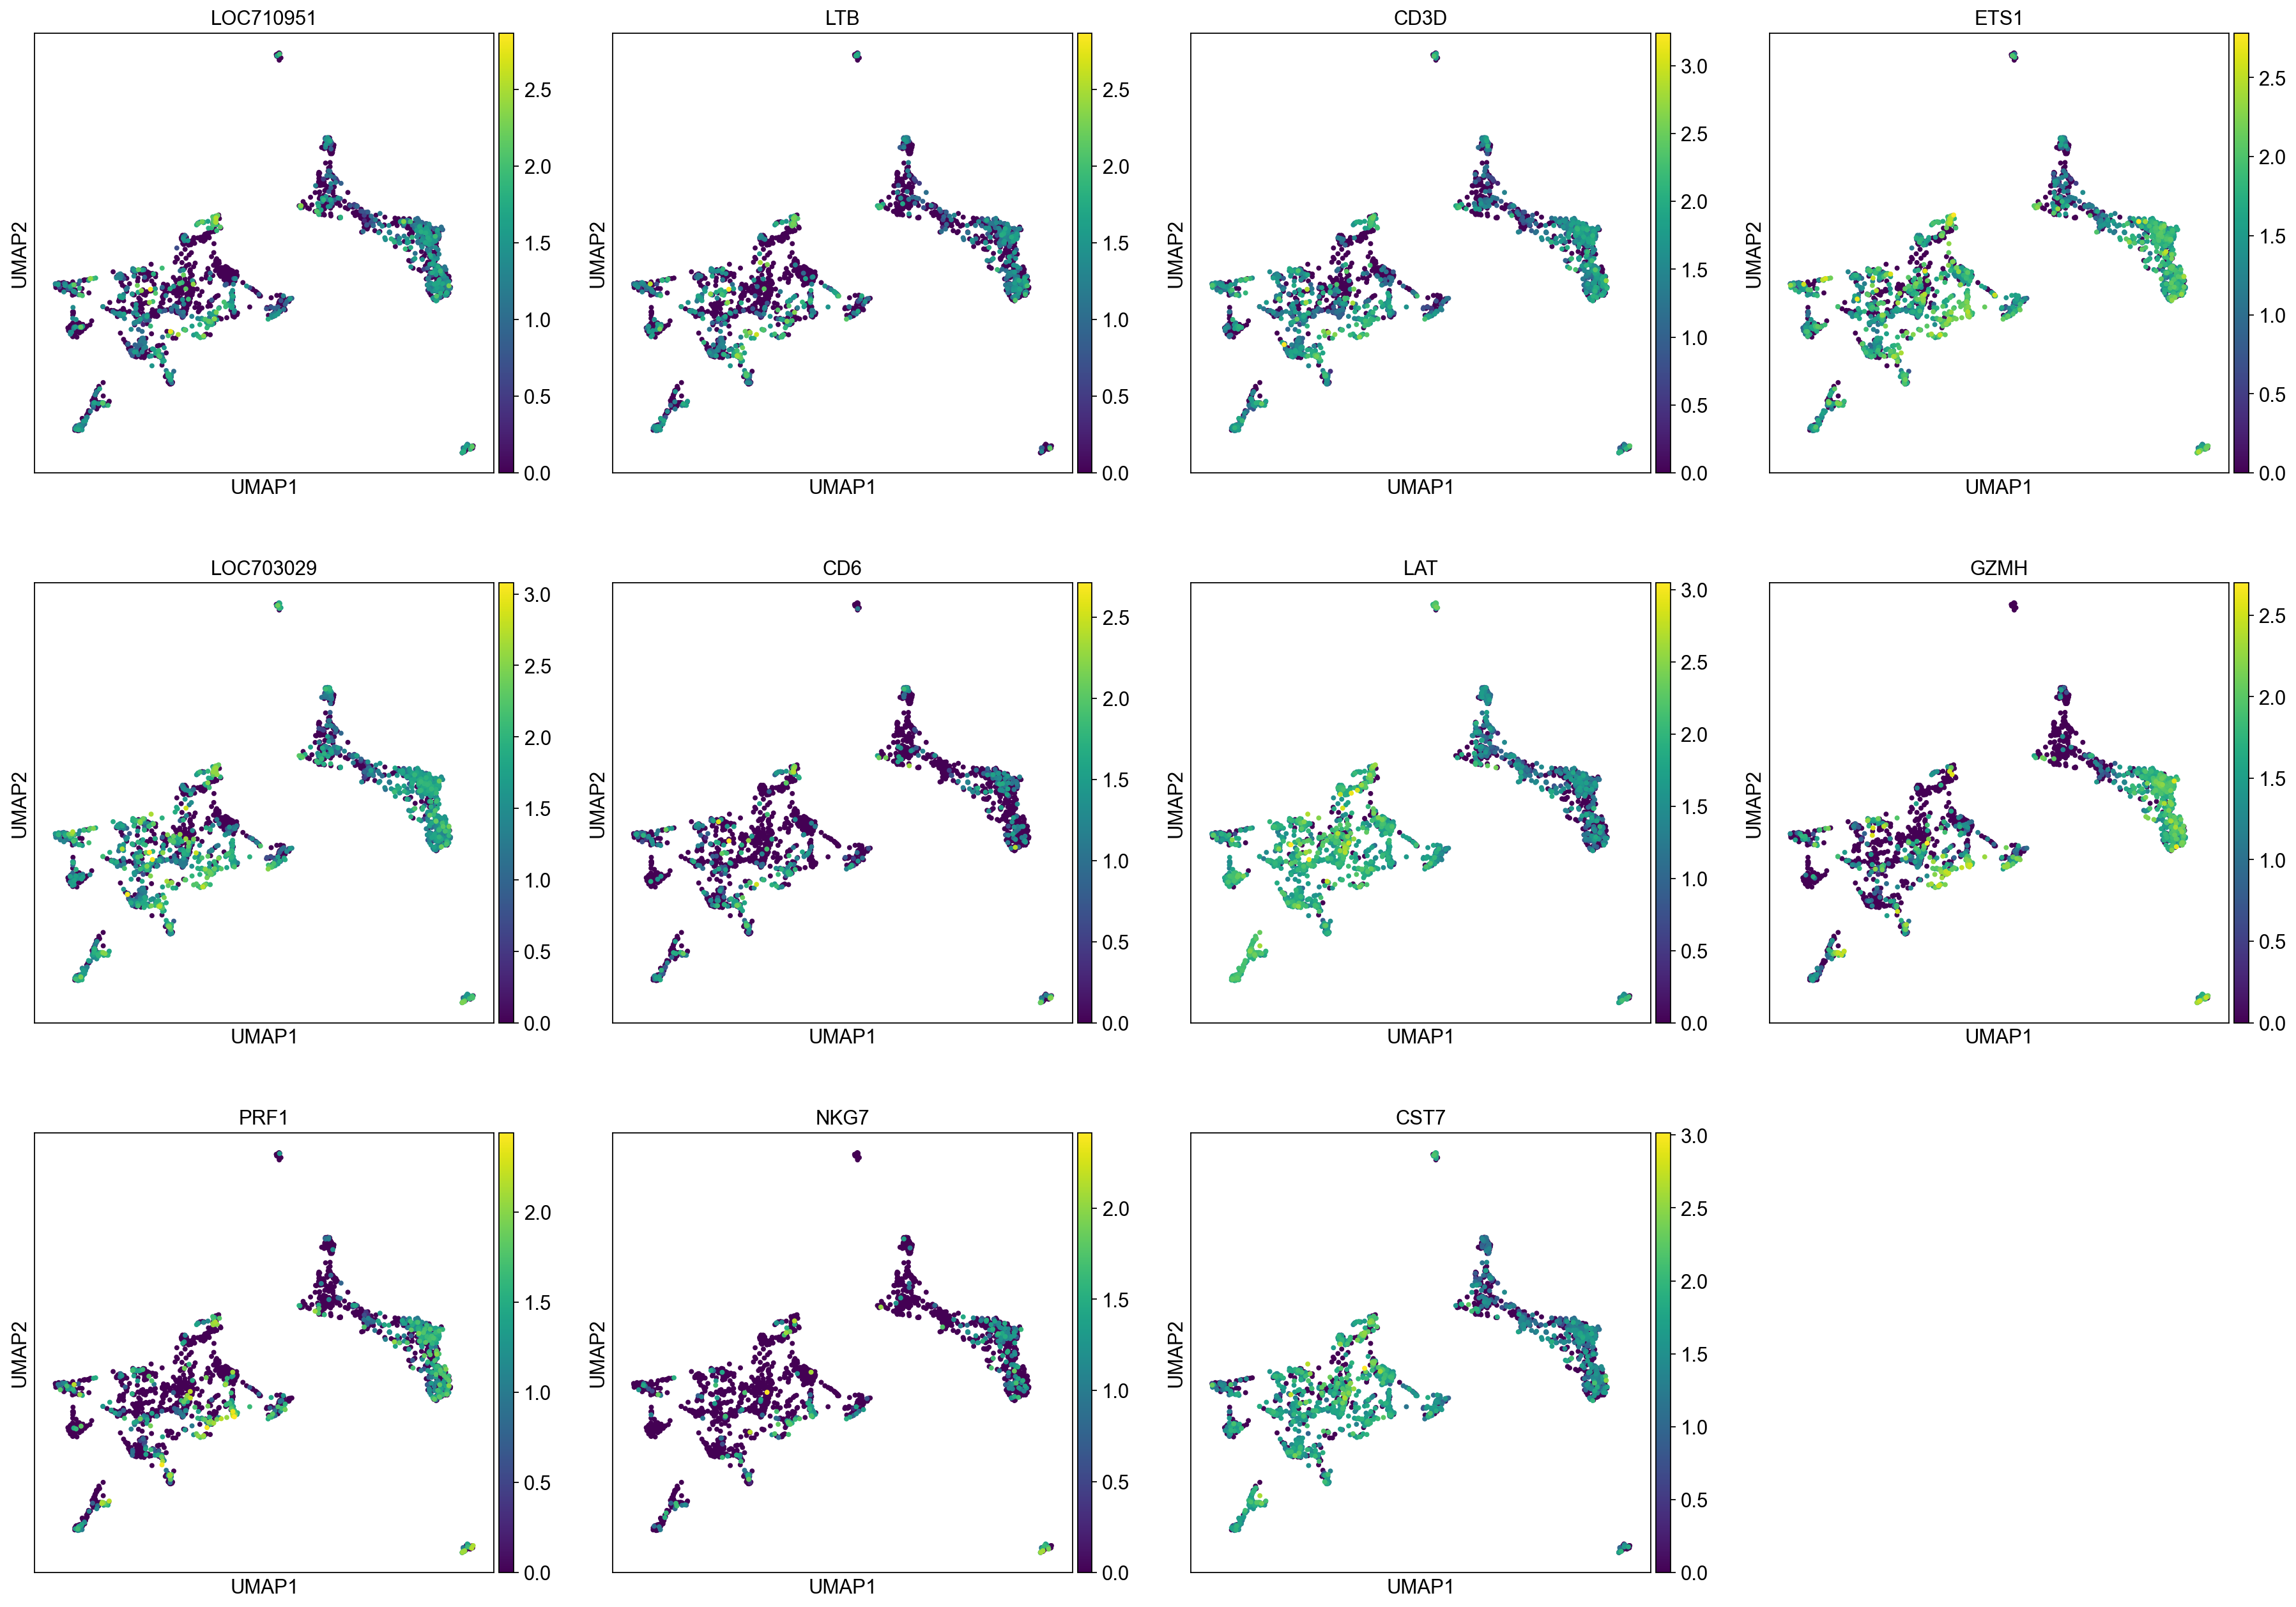

In [107]:
#adata.write(results_file)#plotting the results
# T cells from top markers from combined clusters
sc.pl.umap(T_cells, color=["LOC710951" ,"LTB" ,"CD3D", "ETS1" ,"LOC703029", "CD6","LAT","GZMH","PRF1","NKG7","CST7"])
# sc.pl.umap(T_NK_cells, color=["CD3G","CD3D","BCL11B","ETS1","CD247","CD5","RORA","CD3E"])


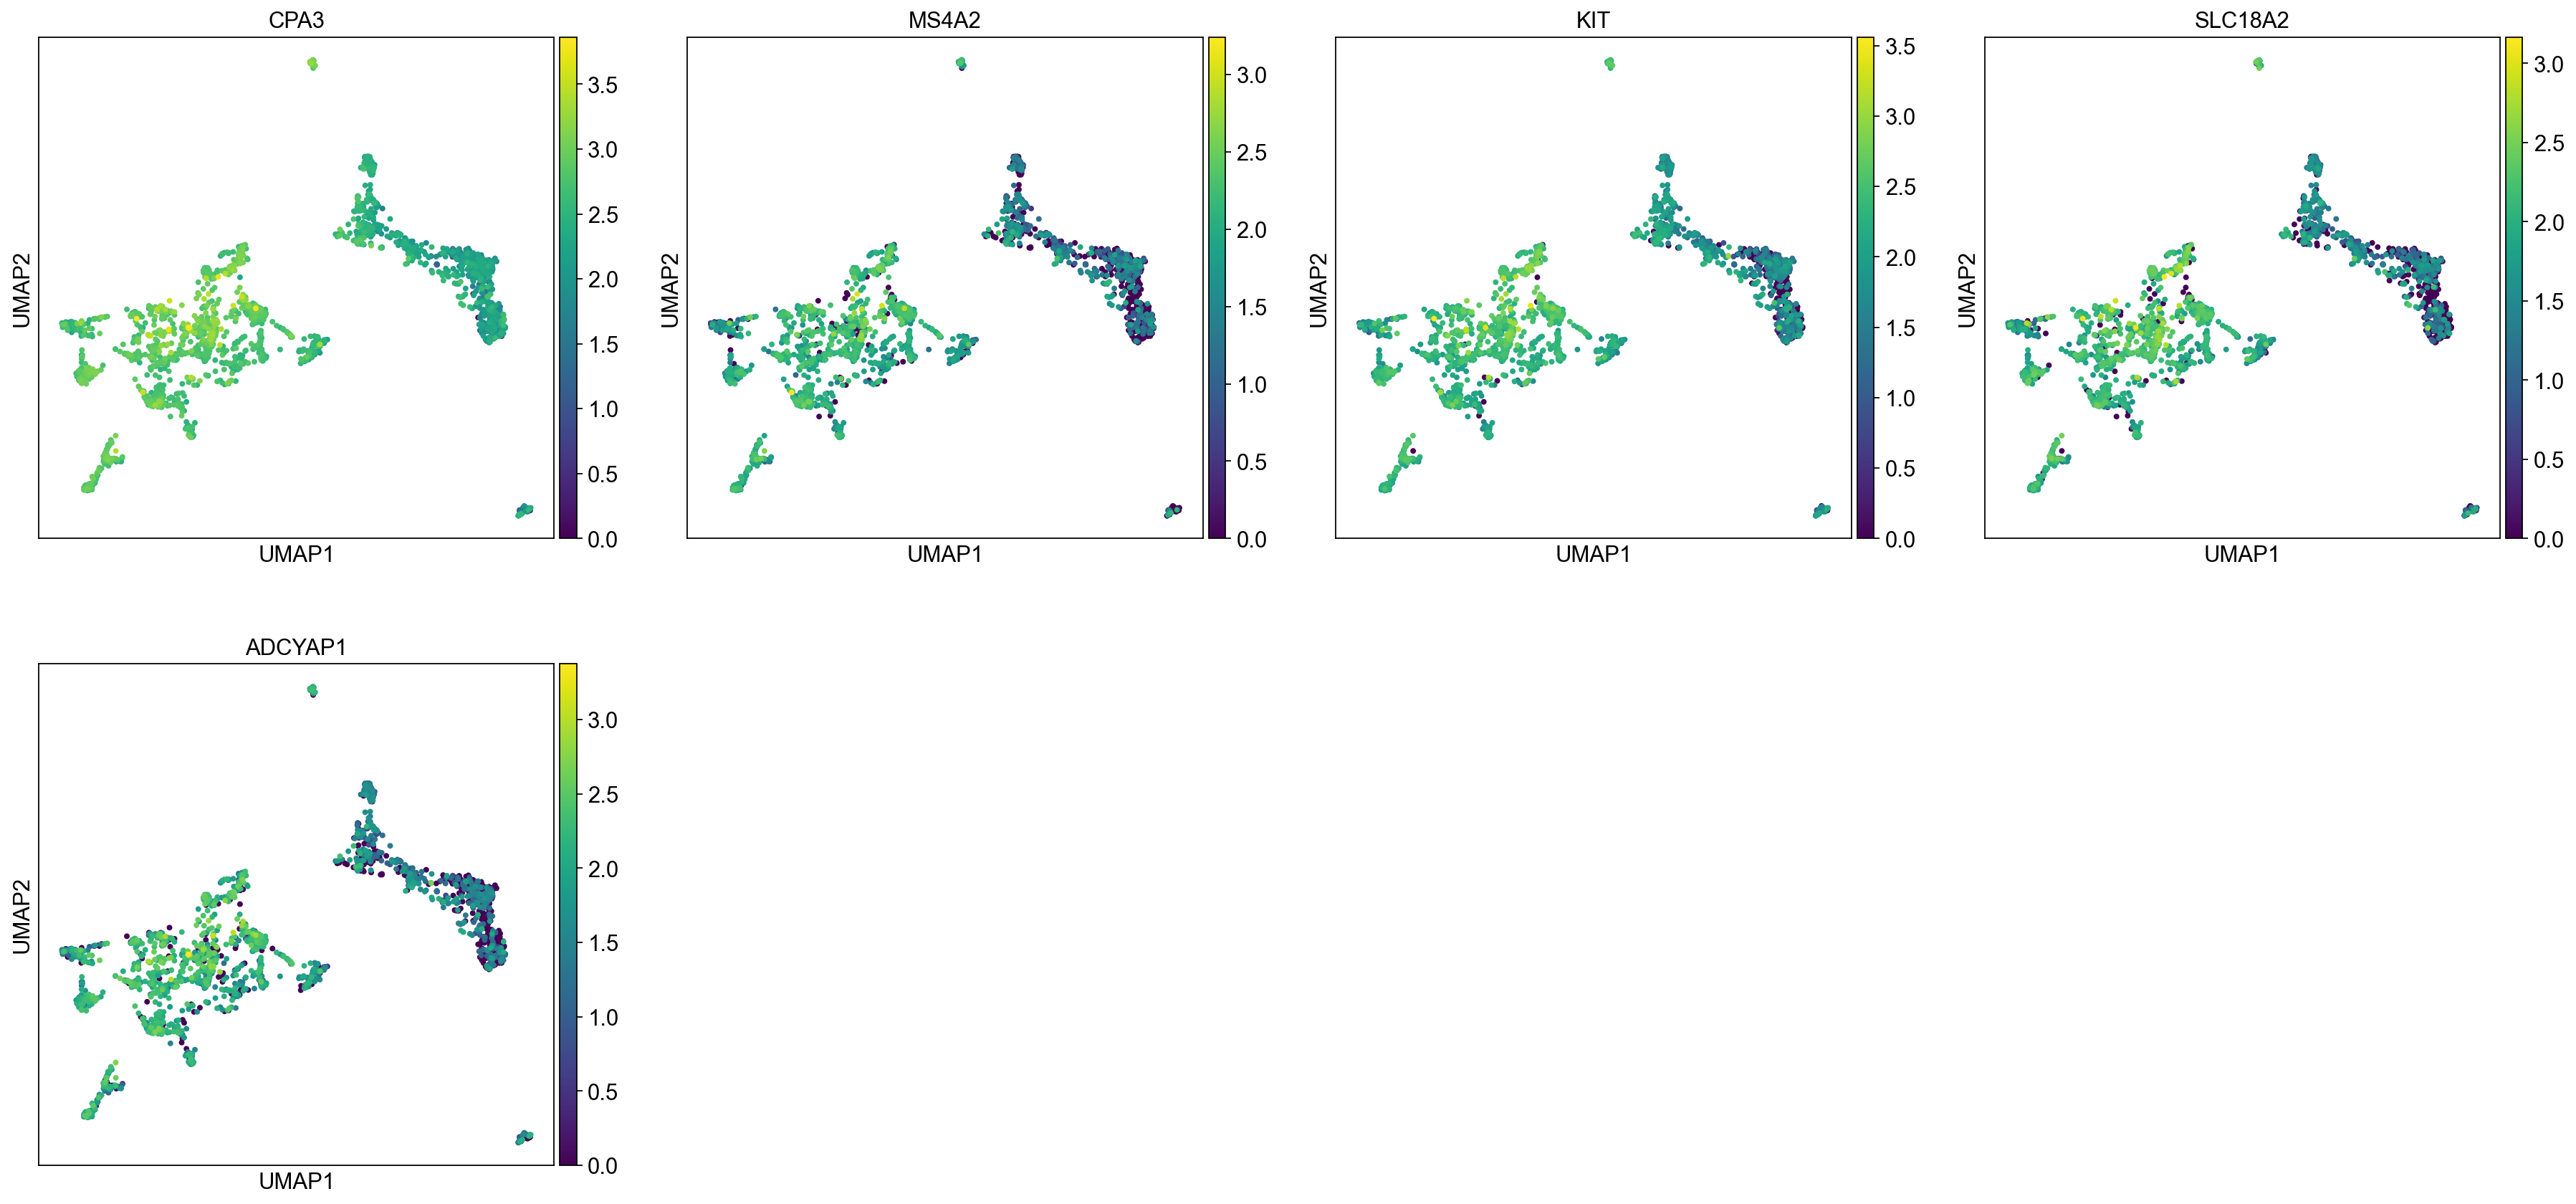

In [105]:
#adata.write(results_file)#plotting the results
# mast cells
sc.pl.umap(T_cells, color=["CPA3", "MS4A2" ,"KIT" ,"SLC18A2", "ADCYAP1"])

In [ ]:
#adata.write(results_file)#plotting the results
# b cells
sc.pl.umap(T_NK_cells, color=["MS4A1", "CD19" ,"CD79A" ,"CD79B", "CXCR5" ,"BANK1", "LOC701504" ,"LOC100430606", "CD2" ,"LAT"])

In [ ]:
#adata.write(results_file)#plotting the results
# neutrophils
sc.pl.umap(T_NK_cells, color=["TNFRSF10C", "SELL" ,"HCAR2" ,"MXD1"])

In [ ]:
Monocytes = concat_adata[concat_adata.obs['leiden'].isin(["0","2","3","4","5","8","9","13","14","20"])]

In [ ]:
#identify highly variable genes
sc.pp.highly_variable_genes(T_NK_cells, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
sc.pl.umap(T_NK_cells, color=['leiden'], legend_loc='on data')

In [ ]:
sc.pl.umap(concat_adata, color=["CD3G","CD3D","BCL11B","ETS1","CD247","CD5","RORA"],use_raw=False)

In [ ]:
sc.pl.umap(concat_adata, color=['leiden'], legend_loc='on data')

In [ ]:
# top 10 genes expressed in cluster 0
# ["MRC1","ALDH2","FABP4","LTA4H","NGFRAP1","OLR1","ABCG1","APOC2","CD177","CHIT1"]
#this seems like a messy macrophage cluster, presence of markers found in cluster 5 and cluster 14
sc.pl.umap(concat_adata, color=["FABP4","APOC2"],use_raw=False)

In [ ]:
# top 10 genes expressed in cluster 1
# "SPOCK2", "LOC710951" ,"LTB" ,"CD3D", "ETS1" ,"LOC703029", "CD6" ,"FAM46C", "CD2" ,"LAT"
# markers suggest T cells, some presence of it in cluster 7 and 6 and 13
#cluster 13 could be a b cell cluster, cluster 6 and 7 may have high t cells w other mess in there. top left big chunk seems like trash?
sc.pl.umap(concat_adata, color=["SPOCK2", "LOC710951" ,"LTB" ,"CD3D", "ETS1" ,"LOC703029", "CD6" ,"FAM46C", "CD2" ,"LAT"],use_raw=False)

In [ ]:
# top 10 genes expressed in cluster 2
#"APOL2","SOD2","LOC694538","FAM26F","IFI27","RARRES3","C1QA","PSME2","CXCL9","IDO1"
sc.pl.umap(concat_adata, color=["APOL2","SOD2","LOC694538","FAM26F","IFI27","C1QA","CXCL9","IDO1"],use_raw=False)

In [ ]:
# top 10 genes expressed in cluster 3
# "FCN1","VCAN","CFP","TIMP1","EREG","PLBD1","LILRB1","INSIG1","IL1B","PLXNB2"
sc.pl.umap(concat_adata, color=["FCN1","VCAN","CFP","TIMP1","EREG","PLBD1","LILRB1","INSIG1","IL1B","PLXNB2"],use_raw=False)

In [ ]:
# top 10 genes expressed in cluster 4
# "MRC1","MARCO","ALDH2","CHIT1","FABP4","LTA4H","CDH1","SERPINE1","COLEC12","RMDN3"
sc.pl.umap(concat_adata, color=["MARCO","CHIT1","FABP4","SERPINE1"],use_raw=False)

In [ ]:
# top 10 genes expressed in cluster 5
# "FABP4","CHIT1","FN1","MRC1"
sc.pl.umap(concat_adata, color=["FABP4","CHIT1","FN1"],use_raw=False)

In [ ]:
# top 10 genes expressed in cluster 6
# "LOC701504","LOC100430606","GZMB","CD3D"
sc.pl.umap(concat_adata, color=["LOC701504","LOC100430606","CD3D"],use_raw=False)

In [ ]:
# top 10 genes expressed in cluster 7
# "GZMH","GZMB","RGS9","GNLY","CCL5","CX3CR1","PRF1","NKG7","CST7","SYNE1"
sc.pl.umap(concat_adata, color=["GZMH","RGS9","GNLY","CCL5","CX3CR1","PRF1","NKG7","CST7","SYNE1"],use_raw=False)

In [ ]:
# new_cluster_names = ['Monocytes 1','T cells 1', 'Monocytes 2','Monocytes 3', 'Monocytes 4',
#                      'Monocytes 5','T cells 2','T cells 3','Monocytes 6','Monocytes 7','Mast cells',
#                     'B cells', 'Endothelial','Monocytes 8','Monocytes 9','Pulmonary alveloar Type II',
#                     'Neutrophils','Fibroblasts','Non-immune 1','Non-immune 2', 'Monocytes 10',
#                     'Ciliated epithelial cells', 'Mesothelial']
# concat_adata.rename_categories('leiden', new_cluster_names)

In [ ]:
# Markers = {'T cells':["CD3D","CD6","GZMH","PRF1","GZMB"],
#            'B cells':["MS4A1","CD19","CD79A","CD79B","CXCR5"],
#           'Ciliated Epithial cells':["ARMC3","DNAH9","CFAP43","DNAI1","RSPH1"],
#           'Mesothelial':["PRG4","ITLN1","BNC1","RSPO1","PKHD1L1"],
#           'Fibroblasts':["COL6A1","LAMB1","COL6A3","COL3A1","DKK3"]}
# sc.pl.dotplot(concat_adata, Markers, groupby='leiden')

In [ ]:
### Macrophage Featureplot
sc.pl.umap(concat_adata, color=["CSF1R", "MARCO","VCAN","C1QA","MKI67","CD68","CD14"],use_raw=False)

In [ ]:
#Inflammatory macrophages Featureplot
sc.pl.umap(concat_adata, color=["CXCL9", "CXCL10", "CXCL11"],use_raw=False)

In [ ]:
#Fibroblasts
sc.pl.umap(concat_adata, color=["COL1A2","ITLN1","DCN","EPAS1"],use_raw=False)

In [ ]:
#Mast cells
sc.pl.umap(concat_adata, color=["CPA3","FCER1A","KIT","MS4A2"],use_raw=False)

In [ ]:
#Type II Pneumocytes featureplot
sc.pl.umap(concat_adata, color=["SFTPB","SFTPC"],use_raw=False)

In [ ]:
#plotting the results
#sc.pl.umap(combined_adata, color=['sample', 'drug', 'day'])